# CS512– Artificial Intelligence

##Lab Assignment - 2 | Due on 10th-March-2022   2400 Hrs     (150 Marks)


**Submission Instructions**:

All submission is through google classroom submitting the colab (.ipynb file). In case you face any trouble with the submission, please contact the TAs:

*   Armaan Garg, armaan.19CSZ0002@iitrpr.ac.in
*   Shivam Kainth shivam.20csz0006@iitrpr.ac.in

Your submission must be your original work. **Do not indulge in any kind of plagiarism or copying**. Abide by the honour and integrity code to do your assignment.



**Penalty Policy**: Late submissions will attract penalties. There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. for 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.

All the plots and observations should be added to the colab notebook itself.

**Naming Convention**:

Name the colab file submission as follows: Name_rollnumber_Labnumber.ipynb
E.g. if your name is ABC, roll number is 2019csx1234 and submission is for assignment1 then you should name the colab file as: ABC_2019csx1234_Lab1.ipynb


# Problem 1: The Last Stone Game

The Last Stone is a two player game played over a square grid with stone pebbles of two colours (one for each player). A player is allowed to either place **one** stone or **two** stones in a single play onto the grid. The player who puts **the Last Stone** on the grid **wins** the game. There are some blocked cells in the grid that cannot be used by either players to place any stone. 

Let us assume that you are one of the players and your aim is to win the game (there are only two payoff values possible - +1 for win and -1 for loss). You must have guessed by now that you can be generate your best strategy in this game with the help of Minimax algorithm. 

Information about Minimax:

* Minimax algorithm is a recursive or backtracking algorithm which is used in decision-making and game theory.
* It provides an optimal move for the player assuming that opponent is also playing optimally.
* Minimax algorithm uses recursion to search through the game-tree.
* Minimax algorithm is mostly used for game playing in AI such as Chess, Checkers, tic-tac-toe, Go, and various tow-player games. This algorithm computes the minimax decision for the current state.




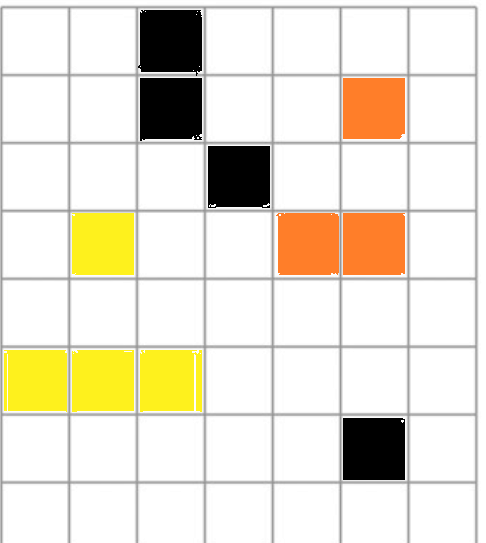


In this image, Red cells denote Player One, Yellow denotes Player Two and Black cells are blocked cells. In current scenario, player yellow has made four moves and now its the Red player's turn.

# Questions
Q.1: Find the best strategy using Minimax algorithm in 5x5 grid with one blocked location. Print the moves in the best strategy. **[10 Marks]**

Q.2: Implement $\alpha - \beta$ pruning to the Minimax algorithm to find the best strategy in 5x5 grid with one blocked location. Print the moves in the best strategy. Comment on the savings achieved with $\alpha - \beta$ pruning as compared to Minimax algorithm in Q.1 **[10 Marks]**

Q.3: Let us assume that the decision on whether a player can place 1 stone or 2 stones is decided based on the toss of a coin. If Head comes then the player can place only 1 stone while a Tail on the coin flip will allow the player to place 2 stones. Find your best strategy in this version of the game using Expecti-Minimax in 5x5 grid with one blocked location. **[15 Marks]**

Q.4: Experiment and analyze the effect of increasing the number of blocked cells from 1 to 5 on the performance of above algorithms (in terms of time, number of nodes explored, size of game tree). **[15 Marks]**


Plot graphs to compare the performance in Q.3 and Q.4

[Bonus] Implement a visualization (GUI) of this game and try to play against your coded algorithms. Report your experience and findings.  **[20 Marks]**

### Input to the program: Grid world and cell's location which are blocked. 
#### Output of the program: (0 or 1), 0 denotes player 1 loses, 1 denotes player 1 wins. 

**Sample code for the Last Stone game**

# **Question No: 1** and it's several Testcases:

In [ ]:
import numpy  as np
from timeit import default_timer as timer
seconds1=[]
node_explored1=[]
tree_size1=[]

In [ ]:
# Basic Grid world structure is defined here
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  blockedx=np.random.randint(0,5)
  blockedy=np.random.randint(0,5)
  world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
  
begin_game()
world

array([[0., 5., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
def p1_choice(free_cells):
  ##########
  #your code goes here.
  # this min_max function return a choice to either put 1 marble or two marbles on the grid for player 1 .
  ##########
  score, move=MiniMax(free_cells, MAX)
  #print(score,move)
  return choices[move]

In [ ]:
def p2_choice(free_cells):
  ##########
  #your code goes here.
  # this min_max function return a choice to either put 1 marble or two marbles on the grid for player 2.
  ########## 
  score, move=MiniMax(free_cells, MIN)
  return choices[move]

In [ ]:
def score_calculate(cells, const):
    if(cells == 0):                     
        if(-const == MAX):
            return +1 
        else:
            return -1
    elif(cells < 0):                     
        if(-const == MAX): 
            return -1  
        else:
            return +1
    else:
        return 0 


counter=[0]
def MiniMax(cells, const):
    counter[0]+=1
    if(cells <= 0):
        return [score_calculate(cells, const), 0]
    
    possible=[]
    for i in range(len(choices)): 
        value, move = MiniMax(cells - choices[i], -const)
        possible.append(value)
    if (const == MAX): 
        value = max(possible)
        move = [i for i, score in enumerate(possible) if score == value]
        return [value, move[0]]
    else:
        value = min(possible)
        move = [i for i, score in enumerate(possible) if score == value]
        return [value, move[0]]

In [ ]:
MAX = +1
MIN = -1
choices=[1,2]
global turn
turn=0

def gameplay():
  
  # emptycells=np.count_nonzero(world==0) # retuns number of empty cells in the world.
  # while(emptycells):
    
  #   player1=p1_choice() #define this function to return the choice for number of marbles to be put by player one
  #   player2=p2_choice() #define this function to return the choice for number of marbles to be put by player two.
  #   # remember the allowed choices for both are 1 marbles or 2 marbles. 
  #   emptypos=np.where(world == 0)# valid positions where marbles can be placed
    
  #   allowedpos=list(zip(emptypos[0],emptypos[1]))# return a list of coordinated wheere board is empty
  #   print(allowedpos)
  #   if(player1==1):
  #     world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
  #     allowedpos.pop()
      
  #   elif(player1==2):
  #     # player 1 has chosen to put two sticks, hence we put "1" at two positions
  #     world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
  #     allowedpos.pop()# removes first ovvupied postion form the list. 
  #     world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
  #     allowedpos.pop()
  #     print(world)
    
  #     turn = 1
  #   emptypos=np.where(world == 0)# valid positions where marbles can be placed
    
  #   allowedpos=list(zip(emptypos[0],emptypos[1]))# return a list of coordinated wheere board is empty
  #   emptycells=np.count_nonzero(world==0) 
  #   if(emptycells==0):
    
  #     break;
  #   ### player 2's turn
  #   player2=p2_choice() #define this function to return the choice for number of marbles to be put by player two.
  #   if(player2==1):
  #     world[allowedpos[0][0]][allowedpos[0][1]]=2 # sets first available allowed position to 2(2 denotes player 1 has placed it's marble there)
  #     allowedpos.pop()
  #   else:
  #     # player 2 has chosen to put two sticks, hence we put "2" at two positions
  #     world[allowedpos[-1][-1]][allowedpos[0][1]]=2 # sets first available allowed position to 2(2 denotes player 2 has placed it's marble there)
  #     allowedpos.pop()
  #     world[allowedpos[-1][-1]][allowedpos[0][1]]=2 
  #     allowedpos.pop()
  #   turn=2
  #   emptycells=np.count_nonzero(world==0)
  #   if(emptycells==0):
  #     break;
  #   emptycells=np.count_nonzero(world==0)

  emptypos=np.where(world == 0)
  allowedpos=list(zip(emptypos[0],emptypos[1]))
  emptycells=np.count_nonzero(world==0)
  size=0
  while(emptycells):
    player1=p1_choice(emptycells)
    size+=1
    if(player1==1):
      world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)
    elif(player1==2):
      world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)# removes first ovvupied postion form the list. 
      world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)
    emptycells-=player1
    print("Player1 choose to pick ", player1, "marbel to place.","emptycells: ",emptycells)
    print(world)
    turn = 1
    if(emptycells==0):
      print("Output is : ",1)
      tree_size1.append(size)
      break;
    ### player 2's turn
    player2=p2_choice(emptycells) #define this function to return the choice for number of marbles to be put by player two.
    size+=1
    if(player2==1):
      world[allowedpos[0][0]][allowedpos[0][1]]=2 # sets first available allowed position to 2(2 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)
    else:
      # player 2 has chosen to put two sticks, hence we put "2" at two positions
      world[allowedpos[0][0]][allowedpos[0][1]]=2 # sets first available allowed position to 2(2 denotes player 2 has placed it's marble there)
      allowedpos.pop(0)
      world[allowedpos[0][0]][allowedpos[0][1]]=2 
      allowedpos.pop(0)
    emptycells-=player2
    turn=2
    print("Player2 choose to pick ", player2, "marbel to place.","emptycells: ",emptycells)
    print(world)
    if(emptycells==0):
      print("Output is : ",0)
      tree_size1.append(size)
      break;
time_start = timer()
#begin_game()   
gameplay()
time_end = timer()
#print(turn)
seconds1.append(time_end-time_start)
node_explored1.append(counter[0])

print(time_end-time_start)
print(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  23
[[1. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  21
[[1. 5. 2. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  20
[[1. 5. 2. 2. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  18
[[1. 5. 2. 2. 1.]
 [2. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  17
[[1. 5. 2. 2. 1.]
 [2. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  15
[[1. 5. 2. 2. 1.]
 [2. 2. 1. 2. 2.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  14
[[1. 5. 2. 2. 1.]
 [2. 2. 1. 2. 2.]
 [1. 

In [ ]:
## Test case 2
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(2):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer()
gameplay()
time_end = timer()
seconds1.append(time_end-time_start)
node_explored1.append(counter[0])

Player1 choose to pick  2 marbel to place. emptycells:  21
[[1. 5. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  20
[[1. 5. 1. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  18
[[1. 5. 1. 2. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  17
[[1. 5. 1. 2. 1.]
 [1. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  15
[[1. 5. 1. 2. 1.]
 [1. 2. 1. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  14
[[1. 5. 1. 2. 1.]
 [1. 2. 1. 1. 2.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  12
[[1. 5. 1. 2. 1.]
 [1. 2. 1. 1. 2.]
 [1. 

In [ ]:
## test case 3
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(3):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer() 
gameplay()
time_end = timer()
seconds1.append(time_end-time_start)
node_explored1.append(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  21
[[5. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 5. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  20
[[5. 1. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 5. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  18
[[5. 1. 2. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 5. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  17
[[5. 1. 2. 1. 1.]
 [2. 0. 0. 0. 0.]
 [0. 0. 5. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  15
[[5. 1. 2. 1. 1.]
 [2. 1. 1. 0. 0.]
 [0. 0. 5. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  14
[[5. 1. 2. 1. 1.]
 [2. 1. 1. 2. 0.]
 [0. 0. 5. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  12
[[5. 1. 2. 1. 1.]
 [2. 1. 1. 2. 1.]
 [1. 

In [ ]:
## test case 4
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(4):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer() 
gameplay()
time_end = timer()
seconds1.append(time_end-time_start)
node_explored1.append(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  20
[[1. 5. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  18
[[1. 5. 2. 2. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  17
[[1. 5. 2. 2. 1.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  15
[[1. 5. 2. 2. 1.]
 [2. 2. 0. 5. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  14
[[1. 5. 2. 2. 1.]
 [2. 2. 1. 5. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  12
[[1. 5. 2. 2. 1.]
 [2. 2. 1. 5. 2.]
 [2. 0. 0. 0. 5.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  11
[[1. 5. 2. 2. 1.]
 [2. 2. 1. 5. 2.]
 [2. 

In [ ]:
## test case 5
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(5):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer() 
gameplay()
time_end = timer()
seconds1.append(time_end-time_start)
node_explored1.append(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  20
[[1. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 5. 5. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  18
[[1. 5. 2. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 5. 5. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  17
[[1. 5. 2. 2. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 5. 5. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  15
[[1. 5. 2. 2. 1.]
 [2. 2. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 5. 5. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  14
[[1. 5. 2. 2. 1.]
 [2. 2. 1. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 5. 5. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  12
[[1. 5. 2. 2. 1.]
 [2. 2. 1. 2. 2.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 5. 5. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  11
[[1. 5. 2. 2. 1.]
 [2. 2. 1. 2. 2.]
 [1. 

# **Question No: 2** and it's several Testcases

In [ ]:
## Question 2: Using Alpha-Beta Pruning with Minimax algorithm:
from sys import maxsize
seconds2=[]
node_explored2=[]
tree_size2=[]
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  blockedx=np.random.randint(0,5)
  blockedy=np.random.randint(0,5)
  world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
  
begin_game()
counter=[0]

def MiniMax_with_alpha_beta(cells, player,alpha,beta):
    counter[0]+=1
    if(cells <= 0):
        return [score_calculate(cells, player), 0] 

    possible=[]
    if (player == MAX): 
        best=-maxsize
        for i in range(len(choices)):
            score, move = MiniMax_with_alpha_beta(cells - choices[i], -player,alpha,beta)
            possible.append(score)
            
            best = max(best, score)
            alpha = max(alpha, best)
            if beta <= alpha:
                #print("for max player: ",alpha,beta)
                break
        score = best
        move = [i for i, value in enumerate(possible) if value == score]
        return [score, move[0]]
    else:
        worst=maxsize
        for i in range(len(choices)):
            score, move = MiniMax_with_alpha_beta(cells - choices[i], -player,alpha,beta)
            possible.append(score)
            worst = min(worst, score)
            beta = min(beta, worst)
            if beta <= alpha:
                #print("for min player: ",alpha,beta)
                break
        score = worst
        move = [i for i, value in enumerate(possible) if value == score]
        return [score, move[0]]

def p1_choice(free_cells):
  score, move=MiniMax_with_alpha_beta(free_cells, MAX,alpha,beta)
  #print(score,move)
  return choices[move]

def p2_choice(free_cells): 
  score, move=MiniMax_with_alpha_beta(free_cells, MIN,alpha,beta)
  return choices[move]

In [ ]:
alpha=-maxsize
beta=+maxsize
MAX = +1
MIN = -1
# global turn
turn=0
choices=[1,2]
calls=0
def gameplay():
  size=0
  emptypos=np.where(world == 0)
  allowedpos=list(zip(emptypos[0],emptypos[1]))
  emptycells=np.count_nonzero(world==0) # retuns number of empty cells in the world.
  while(emptycells):
    player1=p1_choice(emptycells) #define this function to return the choice for number of marbles to be put by player one
    size+=1
    if(player1==1):
      world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)
    elif(player1==2):
      # player 1 has chosen to put two sticks, hence we put "1" at two positions
      world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)# removes first ovvupied postion form the list. 
      world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)
    emptycells-=player1
    print("Player1 choose to pick ", player1, "marbel to place.","emptycells: ",emptycells)
    print(world)
    
    turn = 1
    if(emptycells==0):
      print("Output is : ", 1)
      tree_size2.append(size)
      break;
    ### player 2's turn
    player2=p2_choice(emptycells) #define this function to return the choice for number of marbles to be put by player two.
    size+=1
    if(player2==1):
      world[allowedpos[0][0]][allowedpos[0][1]]=2 # sets first available allowed position to 2(2 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)
    else:
      # player 2 has chosen to put two sticks, hence we put "2" at two positions
      world[allowedpos[0][0]][allowedpos[0][1]]=2 # sets first available allowed position to 2(2 denotes player 2 has placed it's marble there)
      allowedpos.pop(0)
      world[allowedpos[0][0]][allowedpos[0][1]]=2 
      allowedpos.pop(0)
    emptycells-=player2
    turn=2
    print("Player2 choose to pick ", player2, "marbel to place.","emptycells: ",emptycells)
    print(world)
    if(emptycells==0):
      print("Output is : ",0)
      tree_size2.append(size)
      break  
time_start = timer()
gameplay()
time_end = timer()
seconds2.append(time_end-time_start)
node_explored2.append(counter[0])

print(time_end-time_start)
print(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  23
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  21
[[1. 2. 2. 0. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  20
[[1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  18
[[1. 2. 2. 1. 2.]
 [2. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  17
[[1. 2. 2. 1. 2.]
 [2. 1. 0. 0. 5.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  15
[[1. 2. 2. 1. 2.]
 [2. 1. 2. 2. 5.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  14
[[1. 2. 2. 1. 2.]
 [2. 1. 2. 2. 5.]
 [1. 

**Comment:** From the above experiment we can observed that this algorithm is taking less time to solve the problem along with that it is also searching less tree nodes compared to minimax algorithm as it pruns severaal tree nodes using its alpha beta value retrictions.

In [ ]:
## Test case 2
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(2):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer()
gameplay()
time_end = timer()
seconds2.append(time_end-time_start)
node_explored2.append(counter[0])

Player1 choose to pick  2 marbel to place. emptycells:  21
[[1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 5. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  20
[[1. 1. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 5. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  18
[[1. 1. 2. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 5. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  17
[[1. 1. 2. 1. 1.]
 [2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 5. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  15
[[1. 1. 2. 1. 1.]
 [2. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 5. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  14
[[1. 1. 2. 1. 1.]
 [2. 1. 1. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 5. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  12
[[1. 1. 2. 1. 1.]
 [2. 1. 1. 2. 1.]
 [1. 

In [ ]:
## Test case 3
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(3):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer()
gameplay()
time_end = timer()
seconds2.append(time_end-time_start)
node_explored2.append(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  21
[[1. 5. 0. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  20
[[1. 5. 2. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  18
[[1. 5. 2. 1. 1.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  17
[[1. 5. 2. 1. 1.]
 [2. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  15
[[1. 5. 2. 1. 1.]
 [2. 1. 5. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  14
[[1. 5. 2. 1. 1.]
 [2. 1. 5. 1. 2.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  2 marbel to place. emptycells:  12
[[1. 5. 2. 1. 1.]
 [2. 1. 5. 1. 2.]
 [1. 

In [ ]:
## Test case 4
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(4):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer()
gameplay()
time_end = timer()
seconds2.append(time_end-time_start)
node_explored2.append(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  20
[[5. 1. 0. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  18
[[5. 1. 2. 2. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  17
[[5. 1. 2. 2. 1.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  15
[[5. 1. 2. 2. 1.]
 [2. 2. 0. 5. 0.]
 [0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  14
[[5. 1. 2. 2. 1.]
 [2. 2. 1. 5. 0.]
 [0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]]
Player2 choose to pick  2 marbel to place. emptycells:  12
[[5. 1. 2. 2. 1.]
 [2. 2. 1. 5. 2.]
 [2. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  11
[[5. 1. 2. 2. 1.]
 [2. 2. 1. 5. 2.]
 [2. 

In [ ]:
## Test case 5
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(5):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer()
gameplay()
time_end = timer()
seconds2.append(time_end-time_start)
node_explored2.append(counter[0])

Player1 choose to pick  2 marbel to place. emptycells:  18
[[1. 1. 5. 0. 5.]
 [0. 0. 0. 0. 0.]
 [5. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]]
Player2 choose to pick  1 marbel to place. emptycells:  17
[[1. 1. 5. 2. 5.]
 [0. 0. 0. 0. 0.]
 [5. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]]
Player1 choose to pick  2 marbel to place. emptycells:  15
[[1. 1. 5. 2. 5.]
 [1. 1. 0. 0. 0.]
 [5. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]]
Player2 choose to pick  1 marbel to place. emptycells:  14
[[1. 1. 5. 2. 5.]
 [1. 1. 2. 0. 0.]
 [5. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]]
Player1 choose to pick  2 marbel to place. emptycells:  12
[[1. 1. 5. 2. 5.]
 [1. 1. 2. 1. 1.]
 [5. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]]
Player2 choose to pick  1 marbel to place. emptycells:  11
[[1. 1. 5. 2. 5.]
 [1. 1. 2. 1. 1.]
 [5. 5. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]]
Player1 choose to pick  2 marbel to place. emptycells:  9
[[1. 1. 5. 2. 5.]
 [1. 1. 2. 1. 1.]
 [5. 5

# **Question No: 3** and it's several Testcases

In [ ]:
## Question 3: Solving Using Expecti-Minimax Algorithm:
seconds3=[]
node_explored3=[]
tree_size3=[]
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(1):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
def score_calculate(free_cells, const):
    if(free_cells == 0):                     
        if(-const == MAX):
            return +1 
        else:
            return -1
    elif(free_cells < 0):                     
        if(-const == MAX): 
            return -1  
        else:
            return +1
    else:
        return 0 
counter=[0]
def Expecti_MiniMax(cells, player):
    counter[0]+=1
    if(cells <= 0):
        return [score_calculate(cells, player), 0]
    
    possible=[]
    if (player == MAX): 
        highscore=-maxsize
        for i in range(len(choices)):
            score, move = Expecti_MiniMax(cells - choices[i], 0)
            possible.append(score)
            highscore=max(highscore,score)
        score =highscore
        move = [i for i, value in enumerate(possible) if value == score]
        return [score, move[0]]
    elif (player == MIN):
        highscore=maxsize
        for i in range(len(choices)):
            score,move = Expecti_MiniMax(cells -choices[i], 0)
            possible.append(score)
            highscore=min(highscore,score)
        score = highscore
        move = [i for i, value in enumerate(possible) if value == score]
        return [score, move[0]]
    else:
        highscore=0
        for i in range(len(choices)):
            score,move = Expecti_MiniMax(cells -choices[i], -player)
            highscore = highscore + 0.5 * score
            possible.append(highscore)
        score = highscore
        move = [i for i, value in enumerate(possible) if value == score]
        return [score, move[0]]
def p1_choice(free_cells):
  score, move=Expecti_MiniMax(free_cells, MAX)
  return choices[move]

def p2_choice(free_cells): 
  score, move=Expecti_MiniMax(free_cells, MIN)
  return choices[move]


In [ ]:
MAX = +1
MIN = -1
# global turn
turn=0
choices=[1,2]
def gameplay():
  size=0
  emptypos=np.where(world == 0)
  allowedpos=list(zip(emptypos[0],emptypos[1]))
  emptycells=np.count_nonzero(world==0) # retuns number of empty cells in the world.
  while(emptycells):
    player1=p1_choice(emptycells)
    size+=1 
    if(player1==1):
      world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)
    elif(player1==2):
      # player 1 has chosen to put two sticks, hence we put "1" at two positions
      world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)# removes first ovvupied postion form the list. 
      world[allowedpos[0][0]][allowedpos[0][1]]=1 # sets first available allowed position to 1(1 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)
    emptycells-=player1
    print("Player1 choose to pick ", player1, "marbel to place.","emptycells: ",emptycells)
    print(world)
    
    turn = 1 
    if(emptycells==0):
      print("Output is : ",1)
      tree_size3.append(size)
      break;
    ### player 2's turn
    player2=p2_choice(emptycells) #define this function to return the choice for number of marbles to be put by player two.
    size+=1
    if(player2==1):
      world[allowedpos[0][0]][allowedpos[0][1]]=2 # sets first available allowed position to 2(2 denotes player 1 has placed it's marble there)
      allowedpos.pop(0)
    else:
      # player 2 has chosen to put two sticks, hence we put "2" at two positions
      world[allowedpos[0][0]][allowedpos[0][1]]=2 # sets first available allowed position to 2(2 denotes player 2 has placed it's marble there)
      allowedpos.pop(0)
      world[allowedpos[0][0]][allowedpos[0][1]]=2 
      allowedpos.pop(0)
    emptycells-=player2
    turn=2
    print("Player2 choose to pick ", player2, "marbel to place.","emptycells: ",emptycells)
    print(world)
    if(emptycells==0):
      print("Output is : ",0)
      tree_size3.append(size)
      break; 
begin_game()
time_start = timer()
gameplay()
time_end = timer()
seconds3.append(time_end-time_start)
node_explored3.append(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  23
[[1. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  22
[[1. 2. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  21
[[1. 2. 5. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  20
[[1. 2. 5. 1. 2.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  19
[[1. 2. 5. 1. 2.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  18
[[1. 2. 5. 1. 2.]
 [1. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  17
[[1. 2. 5. 1. 2.]
 [1. 2. 1. 0. 0.]
 [0. 

In [ ]:
## Test case 2
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(2):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer()
gameplay()
time_end = timer()
seconds3.append(time_end-time_start)
node_explored3.append(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  23
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  22
[[1. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  21
[[1. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  20
[[1. 2. 1. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  19
[[1. 2. 1. 2. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  18
[[1. 2. 1. 2. 1.]
 [2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  17
[[1. 2. 1. 2. 1.]
 [2. 1. 0. 0. 0.]
 [0. 

In [ ]:
## Test case 3
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(3):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer()
gameplay()
time_end = timer()
seconds3.append(time_end-time_start)
node_explored3.append(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  21
[[1. 0. 0. 0. 0.]
 [0. 5. 5. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  20
[[1. 2. 0. 0. 0.]
 [0. 5. 5. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  19
[[1. 2. 1. 0. 0.]
 [0. 5. 5. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  18
[[1. 2. 1. 2. 0.]
 [0. 5. 5. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  17
[[1. 2. 1. 2. 1.]
 [0. 5. 5. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  16
[[1. 2. 1. 2. 1.]
 [2. 5. 5. 0. 0.]
 [0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  15
[[1. 2. 1. 2. 1.]
 [2. 5. 5. 1. 0.]
 [0. 

In [ ]:
## Test case 4
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(4):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer()
gameplay()
time_end = timer()
seconds3.append(time_end-time_start)
node_explored3.append(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  21
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 5. 0.]
 [0. 0. 0. 5. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  20
[[1. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 5. 0.]
 [0. 0. 0. 5. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  19
[[1. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 5. 0.]
 [0. 0. 0. 5. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  18
[[1. 2. 1. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 5. 0.]
 [0. 0. 0. 5. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  17
[[1. 2. 1. 2. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 5. 0.]
 [0. 0. 0. 5. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  16
[[1. 2. 1. 2. 1.]
 [2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 5. 0.]
 [0. 0. 0. 5. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  15
[[1. 2. 1. 2. 1.]
 [2. 1. 0. 0. 0.]
 [0. 

In [ ]:
## Test case 5
def begin_game():
  global world 
  world=np.zeros([5,5]) #5x5 grid world
  for i in range(5):
      blockedx=np.random.randint(0,5)
      blockedy=np.random.randint(0,5)
      world[blockedx][blockedy]=5 # 5 denotes "black grid cell" ie. the location is blocked and no player can place it's marble there.
begin_game()
time_start = timer()
gameplay()
time_end = timer()
seconds3.append(time_end-time_start)
node_explored3.append(counter[0])

Player1 choose to pick  1 marbel to place. emptycells:  19
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [5. 5. 5. 0. 5.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  18
[[1. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [5. 5. 5. 0. 5.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  17
[[1. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [5. 5. 5. 0. 5.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  16
[[1. 2. 1. 2. 0.]
 [0. 0. 0. 0. 0.]
 [5. 5. 5. 0. 5.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  15
[[1. 2. 1. 2. 1.]
 [0. 0. 0. 0. 0.]
 [5. 5. 5. 0. 5.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]]
Player2 choose to pick  1 marbel to place. emptycells:  14
[[1. 2. 1. 2. 1.]
 [2. 0. 0. 0. 0.]
 [5. 5. 5. 0. 5.]
 [0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0.]]
Player1 choose to pick  1 marbel to place. emptycells:  13
[[1. 2. 1. 2. 1.]
 [2. 1. 0. 0. 0.]
 [5. 

# **Question No: 4** Graph Plot comparing tree size, node explored and time of each algorithm on different test cases.

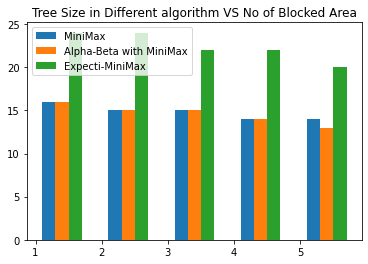

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# print(len(tree_size3),len(tree_size2),len(tree_size1))
# print(len(node_explored1),len(node_explored2),len(node_explored3))
# print(len(seconds1),len(seconds2),len(seconds3))
test_case=[1,2,3,4,5]
n=5
r = np.arange(n)
width = 0.25
# print(tree_size2)

# plt.plot(test_case, tree_size2, label = "Alpha-Beta with MiniMax")
# plt.plot(test_case, tree_size3, label = "Expecti-MiniMax")
# plt.plot(test_case, tree_size1, label = "MiniMax")
# plt.xlabel("No of bloced area")
# plt.ylabel("Generated Tree Size")
# plt.title("Generated Tree Size in Different algorithm VS No of Blocked Area")
# #plt.xticks(r + width/2,['1','2','3','4','5'])
# plt.legend()
# plt.show()
x_axis = np.arange(len(test_case))

# Multi bar Chart

plt.bar(x_axis +0.20, tree_size1, width=0.2, label = 'MiniMax')
plt.bar(x_axis +0.20*2, tree_size2, width=0.2, label = 'Alpha-Beta with MiniMax')
plt.bar(x_axis +0.20*3,tree_size3, width=0.2, label = 'Expecti-MiniMax')

# Xticks

plt.xticks(x_axis,test_case)

# Add legend
plt.title("Tree Size in Different algorithm VS No of Blocked Area")
plt.legend()

# Display

plt.show()

**Observation** : From the above plot we see that increasing the number of blocked unit from one to five the tree size of the minimax algorithm and alpha beta with minimax is almost same in every test case but expecti minimax algorithm have larger tree size compared to other two algorithm . This is because of the fact that at every turn this algorithm randomly placing 1 or two stones in the grid. That is whu it takes much longer tree for convergernce and get a solution at the end.

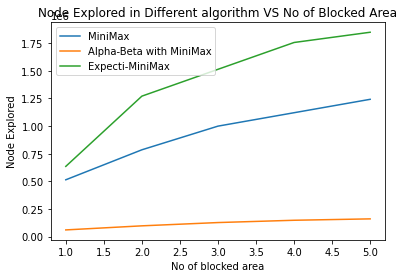

In [ ]:
plt.plot(test_case, node_explored1, label = "MiniMax")
plt.plot(test_case, node_explored2, label = "Alpha-Beta with MiniMax")
plt.plot(test_case, node_explored3, label = "Expecti-MiniMax")
plt.xlabel("No of blocked area")
plt.ylabel("Node Explored")
plt.title("Node Explored in Different algorithm VS No of Blocked Area")
#plt.xticks(r + width/2,['1','2','3','4','5'])
plt.legend()
plt.show()

**Observation:** Here from the graphwe notice that number of nodes explored is lowest in case of alpha beta pruning with minimax compared to other two algorithm because it pruns the unnecessary nodes while expanding the tree based on the possible moves. Where as on normal minimax it goes for all possible move and return with best solution. So it will explored whole tree. But for expecti minimax it creates tree based on random moves and takes the best solution depending upon the values of chance nodes. So it creates extra nodes along with nodes of minimax algorithm. So it has much higher node explored value.

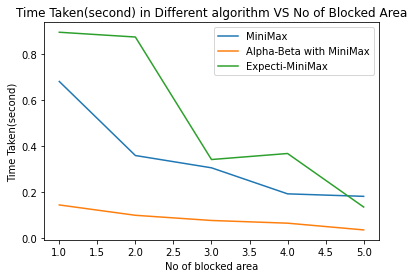

In [ ]:
plt.plot(test_case, seconds1, label = "MiniMax")
plt.plot(test_case, seconds2, label = "Alpha-Beta with MiniMax")
plt.plot(test_case, seconds3, label = "Expecti-MiniMax")
plt.xlabel("No of blocked area")
plt.ylabel("Time Taken(second)")
plt.title("Time Taken(second) in Different algorithm VS No of Blocked Area")
plt.legend()
plt.show()

**Observation:** As expected alpha beta pruning with minimax has lower execution time commpared to other algorithm as it explores nodes based on alpha beta restrictions. Whereas normal minimax algorithm grows complete tree based on all possible moves so it will take much time compared alpha beta pruning. And the expecti minimax algorithm in each turn choose random moves which makes large tree for a single problem instance along with it has an overhead of calculating chance node values. So it will take the highest time compared to other two algorithm.

# Problem 2: Solving Vehicle Routing Problem

Imagine you are running a logistics company using a single transport lorry. Your daily task involves scheduling deliveries for various customers spread across the city at different locations. Since, you always want to have the best customer feedback to grow your business, your aim is to perform all the deliveries to all the customers in the least possible time (this will also save your fuel cost). 

You also plan to use your AI expertise in your work, hence you plan to use Genetic Algorithm (GA) to find the best route across the city to perform the deliveries.

#### Typical GA flow:
1. Initialize a population.
2. Determine the fitness of all the individuals in the population.
3. Until **Done** repeat:
    1. Select parents.
    2. Perform crossover and mutation.
    3. Calculate the fitness of the new children.
    4. Append it to the gene pool.

## Questions
Five sets of problem instances each having 25 customer locations (X,Y) are provided for your implementation. Consider that it takes 1 unit of time to travel a unit distance.

Download Problem Instances: [routes.csv](https://drive.google.com/file/d/1JWLffb_5eJyiML81VtJF8ISV2le4QxMC/view?usp=sharing)

**Question 1**: Implement GA to find the most optimal route of customer deliveries with crossover probability as 0.5 and mutaion probability as 0.01 with a population size of 20. Operators to be used: [**20 marks**]
* Selection: Tournament selection
* Crossover: Partially Mapped Crossover (PMX) (to know more [click here](http://www.wardsystems.com/manuals/genehunter/crossover_of_enumerated_chromosomes.htm))
* Mutation: Single point mutation
Make your own decisions on the number of generation and report the same.
Print the fitness and the best route for all the problem instances. 

**Question 2**: Analyze the effect of increasing the crossover probability from the set - {0.5,0.6,0.7,0.8,0.9} and plot the fitness of the best solution for all the problem instances. Comment on the effect of crossover probability on GA performance. [**15 Marks**]

**Question 3**: Analyze the effect of increasing the mutation probability from the set -  {0.01,0.02,0.03,0.05,0.07} and plot the fitness of the best solution for all the problem instances. Comment on the effect of mutation probability on GA performance. [**15 Marks**]




### Hint
Take the sequence of points travelled by the vehicle as a chromosome.
Here the length of chromeosome will be 25 for all input instances. If the agent took path as 1,2,3,5,4,6,..... the chromosome will be of same sequence i.e. [1|2|3|5|4|6|....].
These chromosomes will then crossover and mutate accordingly and will produce new chromosomes with slightly altered sequencess.
Use fitness function to decide the fitness/suitability of a particular chromeosome and then repeat the experiment until the distance travelled by the sequence is low.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import operator
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/routes_samples.csv")

In [ ]:
import random
def Population(citylist):
  length_of_chromosome=25
  gene="1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25"
  initial_population=[]
  #initial_population.append(citylist)
  for i in range(0,20):
        initial_population.append(random.sample(citylist, length_of_chromosome))
  return initial_population
  

In [ ]:
from copy import deepcopy
def selection(popRanked, eliteSize):
    # best = 0
    # temp = [0]
    # total = list()
    # for i in range(len(popRanked)):
    #     temp = popRanked[random.randint(0, eliteSize-1)]
    #     fit = int(temp[1])
    #     if fit > best:
    #         best = fit
    #     total.append(temp[0])
    # return total
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [ ]:
#import random
def crossover(parentx, parenty, probablity):
    no_couple=round(len(parentx)*probablity)
    q=dict(map(reversed, enumerate(parenty)))
    st=random.randrange(0, len(parentx)-no_couple+1)
    points=[st+i for i in range(no_couple)]
    k=[0]*len(parentx)
    in_x,in_y=[],[]
    for i in points:
        k[i]=parentx[i]
        in_x.append(k[i])
        in_y.append(parenty[i])
    diff_in_y=set(in_y)-set(in_x)
    d = dict(zip(in_y,in_x))
    #print(d)
    for i in (diff_in_y):
        sd=d[i]
        while(True):
            po=q[sd]
            if k[po]==0:
                k[po]=i
                break
            sd=k[po]

    for i in q:
        if i not in k:
            k[q[i]]=i
    #print(k)
    return k

In [ ]:
def mutation(population, mutationRate):
  ##### insert code for mutaiton operator here
  ### remenber the mutaiton rate has to be varied for different trial runs  
    mutatedPop = []
    
    for ind in range(0, len(population)):
        individual=population[ind]
        for swapped in range(len(individual)):
            if(random.random()< mutationRate):
                swapWith = int(random.random() * len(individual))

                city1 = individual[swapped]
                city2 = individual[swapWith]

                individual[swapped] = city2
                individual[swapWith] = city1
        mutatedPop.append(individual)
    return mutatedPop


In [ ]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def Distance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance +=abs(fromCity[0]-toCity[0])+abs(fromCity[1]-toCity[1])
            self.distance = pathDistance
        return self.distance
    
    def fitness_path(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.Distance())
        return self.fitness

def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).fitness_path()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:

def populationstart():
  ## generate random routes using random library
  pass

In [ ]:
 
def nextgen(currentGen, eliteSize, mutationRate,crossoverRate):
    # returns next genration after applying crossover and mutation. 
    # this genration will be used to run GA in next step.
    ra_p = rankRoutes(currentGen)
    selectionResults = selection(ra_p, eliteSize)
    lmpt = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        lmpt.append(currentGen[index])
    children = []
    length = len(lmpt) - eliteSize
    pool = random.sample(lmpt, len(lmpt))

    for i in range(0,eliteSize):
        children.append(lmpt[i])
    
    for i in range(0, length):
        child = crossover(pool[i], pool[len(lmpt)-i-1],crossoverRate)
        children.append(child)
    gen_next = mutation(children, mutationRate)
    return gen_next

In [ ]:
def runalgo(population,tournamentSize, mutationRate,crossoverRate, generations):
    pop = Population(population)
    print("Starting distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextgen(pop, tournamentSize, mutationRate,crossoverRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [ ]:
cityList=[]
cityList4 = []
cityList3 = []
cityList1 = []
cityList2 = []
cityList5 = []
#print(df.columns)
for i in range(0,25):
    x=df['T1:XCOORD.'][i]
    y=df['T1: YCOORD.   '][i]
    cityList1.append((x,y))
cityList.append(cityList1)
for i in range(0,25):
    x=df['T2: XCOORD.'][i]
    y=df['T2: YCOORD.   '][i]
    cityList2.append((x,y))
cityList.append(cityList2)
for i in range(0,25):
    x=df['T3: XCOORD.'][i]
    y=df['T3: YCOORD.   '][i]
    cityList3.append((x,y))
cityList.append(cityList3)
for i in range(0,25):
    x=df['T4:XCOORD.'][i]
    y=df['T4: YCOORD.   '][i]
    cityList4.append((x,y))
cityList.append(cityList4)
for i in range(0,25):
    x=df['T5:XCOORD.'][i]
    y=df['T5: YCOORD.   '][i]
    cityList5.append((x,y))
cityList.append(cityList5)
#print(cityList)
for i in range(5):
  print("for text case ", i+1, " :")
  s=runalgo(population=cityList[i],tournamentSize=15, mutationRate=0.01, crossoverRate=0.5, generations=2000)
  print(s)

for text case  1  :
Starting distance: 480.0
Final distance: 200.0
[(28, 55), (35, 66), (35, 69), (38, 68), (40, 69), (38, 70), (22, 75), (25, 85), (22, 85), (20, 85), (20, 80), (15, 80), (15, 75), (18, 75), (25, 50), (30, 50), (40, 50), (45, 68), (45, 70), (42, 68), (42, 65), (42, 66), (40, 66), (30, 52), (28, 52)]
for text case  2  :
Starting distance: 620.0
Final distance: 282.0
[(5, 45), (8, 45), (20, 55), (34, 25), (32, 20), (48, 20), (44, 5), (42, 10), (36, 18), (36, 40), (10, 40), (8, 40), (25, 35), (30, 35), (33, 35), (33, 32), (35, 32), (26, 32), (30, 30), (25, 30), (10, 35), (5, 35), (2, 40), (0, 40), (0, 45)]
for text case  3  :
Starting distance: 816.0
Final distance: 458.0
[(30, 25), (25, 30), (35, 35), (45, 20), (55, 20), (65, 35), (50, 35), (15, 30), (5, 30), (10, 43), (41, 49), (55, 45), (55, 60), (45, 65), (30, 60), (15, 60), (20, 65), (20, 50), (20, 40), (10, 20), (15, 10), (30, 5), (55, 5), (45, 10), (35, 17)]
for text case  4  :
Starting distance: 996.0000000000001


# **Question 2:** Analysis of effect of increasing the crossover probability from the set - {0.5,0.6,0.7,0.8,0.9}

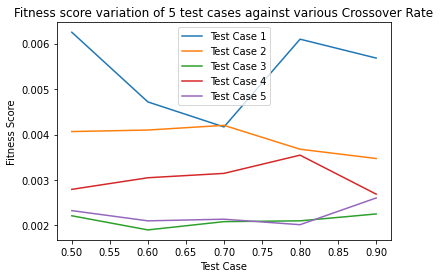

In [ ]:
import matplotlib.pyplot as plt
def runalgo(population,tournamentSize, mutationRate,crossoverRate, generations):
    pop = Population(population)
    #print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextgen(pop, tournamentSize, mutationRate,crossoverRate)
    
    #print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return rankRoutes(pop)[0][1]
test_case1=[]
test_case2=[]
test_case3=[]
test_case4=[]
test_case5=[]
cross_set=[0.5,0.6,0.7,0.8,0.9]
for i in cross_set:
  test_case1.append(runalgo(population=cityList[0],tournamentSize=15, mutationRate=0.01, crossoverRate=i, generations=2000))
  test_case2.append(runalgo(population=cityList[1],tournamentSize=15, mutationRate=0.01, crossoverRate=i, generations=2000))
  test_case3.append(runalgo(population=cityList[2],tournamentSize=15, mutationRate=0.01, crossoverRate=i, generations=2000))
  test_case4.append(runalgo(population=cityList[3],tournamentSize=15, mutationRate=0.01, crossoverRate=i, generations=2000))
  test_case5.append(runalgo(population=cityList[4],tournamentSize=15, mutationRate=0.01, crossoverRate=i, generations=2000))
plt.plot(cross_set, test_case1, label = "Test Case 1")
plt.plot(cross_set, test_case2, label = "Test Case 2")
plt.plot(cross_set, test_case3, label = "Test Case 3")
plt.plot(cross_set, test_case4, label = "Test Case 4")
plt.plot(cross_set, test_case5, label = "Test Case 5")
plt.xlabel("Test Case")
plt.ylabel("Fitness Score")
plt.title("Fitness score variation of 5 test cases against various Crossover Rate")
#plt.xticks(r + width/2,['1','2','3','4','5'])
plt.legend()
plt.show()

**Observation:** Crossover probability doesn't have a benefit by its means or defination. It is merely a parameter that allows you to adjust the behavior of a genetic algorithm. Lowering the crossover probability will let more individuals continue in the next generation unchanged. This may or may not have a positive effect when solving certain problems. A simple way to think about  Crossover is that, it facilitates inheritance of "characteristics"  or "traits" by an offspring from its parents. If we only considers the fitness score values then in our experiment it shows varying behaviour. For some probablity it may generate lower fitness value whereas for some other it will increase.

# **Question No 3**: Analyze the effect of increasing the mutation probability from the set - {0.01,0.02,0.03,0.05,0.07}

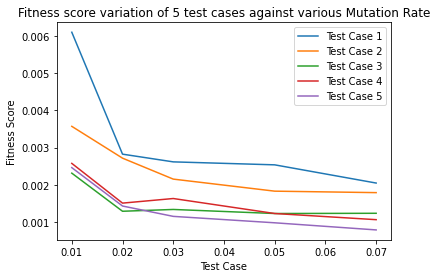

In [ ]:
def runalgo(population,tournamentSize, mutationRate,crossoverRate, generations):
    pop = Population(population)
    #print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextgen(pop, tournamentSize, mutationRate,crossoverRate)
    
    #print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return rankRoutes(pop)[0][1]
test_case1=[]
test_case2=[]
test_case3=[]
test_case4=[]
test_case5=[]
mutation_set=[0.01,0.02,0.03,0.05,0.07]
for i in mutation_set:
  test_case1.append(runalgo(population=cityList[0],tournamentSize=15, mutationRate=i, crossoverRate=0.5, generations=2000))
  test_case2.append(runalgo(population=cityList[1],tournamentSize=15, mutationRate=i, crossoverRate=0.5, generations=2000))
  test_case3.append(runalgo(population=cityList[2],tournamentSize=15, mutationRate=i, crossoverRate=0.5, generations=2000))
  test_case4.append(runalgo(population=cityList[3],tournamentSize=15, mutationRate=i, crossoverRate=0.5, generations=2000))
  test_case5.append(runalgo(population=cityList[4],tournamentSize=15, mutationRate=i, crossoverRate=0.5, generations=2000))
plt.plot(mutation_set, test_case1, label = "Test Case 1")
plt.plot(mutation_set, test_case2, label = "Test Case 2")
plt.plot(mutation_set, test_case3, label = "Test Case 3")
plt.plot(mutation_set, test_case4, label = "Test Case 4")
plt.plot(mutation_set, test_case5, label = "Test Case 5")
plt.xlabel("Test Case")
plt.ylabel("Fitness Score")
plt.title("Fitness score variation of 5 test cases against various Mutation Rate")
#plt.xticks(r + width/2,['1','2','3','4','5'])
plt.legend()
plt.show()

**Observation:** We know that Mutation, being a divergence operation, should happen less frequently, and typically only effects a few members of a population (if any) in any given generation. It is intended to occasionally break one or more members of a population out of a local minimum/maximum space and potentially discover a better minimum/maximum space. This rate determines how many chromosomes should be mutated in one generation. The purpose of mutation is to prevent the GA from converging to local optima, but if it occurs very often, GA is changed to random search. From the above plot it is evident the increasing the mutation rate will decrease the fitness score for some testcase where as it may be same for some testcase or may differ for others.

In [ ]:
def plotgraph():
  ### use this function toplot the graph for the fitness funciton over time.

# Problem 3: Solving the Wordoku puzzle
In this problem, you will design an AI agent to solve the Wordoku puzzle. The core technique to focus on is the Constraint Satisfaction Problem (CSP). You will be implementing two methods to solve the Wordoku puzzle and compare the implementations. Wordoku is an extension of Sudoku
where we have alphabets in place of digits. Some basics about the CSP approach for solving the same
are given below. \

**Puzzle Background** \
The Wordoku puzzle has a 9x9 grid and a set of possible alphabets
with some of the positions filled with those alphabets to ensure a
solution can be reached. The goal is to find and fill remaining cells
with alphabets such that each row, column and the 3x3 square
(sub-grid) all must contain the alphabets, exactly once.
Note: There are exactly nine alphabets among which one of the
characters is needed to be filled in blank space.

Helping note:
Check the Alldiff constraints as discussed for the Sudoku puzzle.


The aim is to choose a value for each variable such that the resulting possible world satisfies the constraint.
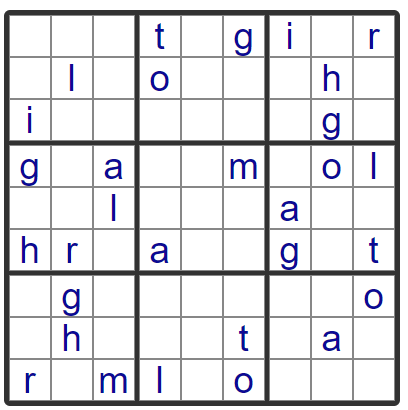
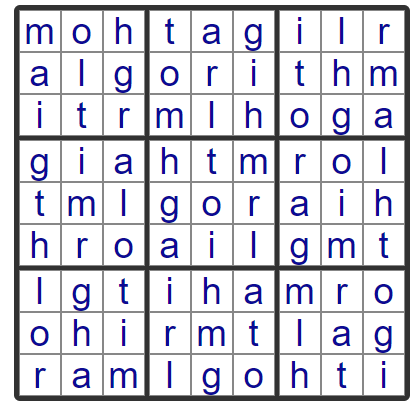

#Questions
**Question 1**: Implement the Backtracking Search with Constraint Propagation which can solve any Wordoku puzzle given as input. Mention your choice of heuristics in Backtracking Search. [**15 marks**]

**Question 2**: Implement the Min_Conflict Search which can solve any Wordoku puzzle given as input.
[**15 marks**]

**Question 3**: State the time and space complexity for each algorithm. Also, provide a table that compares performance of the above two algorithms for each 5 input cases.

Performance metrics: 
* The total clock time, 
* the search clock time, 
* the number of nodes generated

Analyze your results to see if the behaviour you expected has been achieved or not, and why.
[**10 marks**]

**Question 4**: Find all the possible meaningful words formed in any row, column or diagonal in each test case and list them in the output. (If none possible, mention ‘None’ in output) You may want to explore python libraries that can help you with finding meaningful words. [**10 marks**]

## Puzzle Input Format
\"*" denotes empty cells and letters denote the occupied cells.

\* D * * * * A G I \
\* * B * * H * E D \
\* * F * * E * * H \
\* H * * G * I A * \
\* E * * I * * C * \
\* A I * F * * D * \
C * * D * * G * * \
E G * A * * B * * \
I B H * * * * F * \

In [ ]:
from timeit import default_timer as timer
# import numpy  as np 
# def world_init():
#   wordoku=np.zeros([9,9])
#   print(wordoku)
#   return wordoku
# wordoku=world_init()
def create_grid(puzzle):
  grid = []
  grid.append([])
  c = r = 0
  for i in puzzle:
      if i == '*':
          grid[r].append("aghilmort")
      else:
          grid[r].append(i)
      c += 1
      if c == 9 and r < 8:
          c = 0
          r += 1
          grid.append([])
  return grid


#wordoku = create_grid(p)

In [ ]:
def cnostraints(wordoku,position):
  #####
  # this code wil  help you in knowing if the current letter is having a conflict inthe current positio or not.
  # a conflict may arise when same letter is already placed inthe samem row, column or a 3*3 sub grid
  #####
  row,col=position[0],position[1]
  for i in range(9):
    if row != i and len(wordoku[i][col]) == 1:
        wordoku[row][col] = wordoku[row][col].replace(wordoku[i][col], "")
        if len(wordoku[row][col]) == 0:
            return False
  for i in range(9):
      if col != i and len(wordoku[row][i]) == 1:
          wordoku[row][col] = wordoku[row][col].replace(wordoku[row][i], "")
          if len(wordoku[row][col]) == 0:
              return False
  srow = row - (row % 3)
  scol = col - (col % 3)
  for i in range(3):
      for j in range(3):
          if row != (i + srow) and col != (j + scol) and len(wordoku[i + srow][j + scol]) == 1:
              wordoku[row][col] = wordoku[row][col].replace(wordoku[i + srow][j + scol], "")
              if len(wordoku[row][col]) == 0:
                  return False
  return True

In [ ]:
from copy import deepcopy
def constraint_propagation(grid):
    for i in range(9):
        for j in range(9):
            if len(grid[i][j]) > 1:
                if not cnostraints(grid, (i, j)):
                    return False
                if len(grid[i][j]) == 1:
                    return constraint_propagation(grid)
    return True


def min_cell(grid):
    row = col = -1
    min = 9
    flag = 0
    for i in range(9):
        for j in range(9):
            if len(grid[i][j]) > 1 and len(grid[i][j]) < min:
                min = len(grid[i][j])
                row = i
                col = j
                flag = 1
    if flag == 1:
        return True, row, col
    else:
        return False, row, col


In [ ]:
counter=[0]
def backtracking_search(grid,ans):
  #####
  # your code goes here. insert the becktracking search code in this cell /
  #####
  counter[0]+=1
  check, row, col = min_cell(grid)
  if not check:
      if ans == 0:
          return True, grid, ans
      else:
          ans -= 1
          return False, grid, ans
  cell = deepcopy(grid[row][col])
  for i in cell:
      grid[row][col] = i
      clone = deepcopy(grid)
      if constraint_propagation(clone):
          check, final_grid, loop_back = backtracking_search(clone, ans)
          ans = loop_back
          if check:
              return check, final_grid, ans
  return False, grid, ans
  # pass

**Note:** Here I am using a string to create testcase by sending it to create grid function to convert it like grid structure and then sending it to the main function of the algorithm as input.

**Heuristics:** In this algorithm we have used that, for every blank space if any of the values of it's domain creates conflict in row, column or grid then it will discard this value from its domain.

In [ ]:
from datetime import datetime
from collections import namedtuple 
import tabulate
Result = namedtuple(
    "Result", ["Test_Cases", "finished", "Nodes_Generated", "Total_Clock_Time", "Total_Search_Time", "Algorithm"]
)
results = []
#search_time=0
def sudoku(puzzle,result):
    grid = create_grid(puzzle)
    constraint_propagation(grid)
    st=timer()
    check, final_grid, loop_back = backtracking_search(grid, result)
    search_time=timer()-st
    a = [cell for row in final_grid for cell in row]
    # print("".join(a))
    return "".join(a),search_time
p1='g***r*h***m**o**ri*h*l**g*t***a*li*r*********i*go*m***h*a**o*i*og**i**m***i*a***h'
#p='***t*gi*r*l*o***h*i******g*g*a**m*ol**l***a**hr*a**g*t*g******o*h***t*a*r*mi*o***'
for i in range(9):
  for j in range(9):
    print(p1[i+j],end=" ")
  print("\n")

grid1 = create_grid(p1)
start=timer()
solution,tb = sudoku(p1, 0)
ti=timer()-start
print("time taken : ",ti)
#print(solution)
for i in range(9):
  for j in range(9):
    print(solution[i+j],end=" ")
  print("\n")
# print("".join(a))
test_case=[]
test_case.append(solution)
r=Result(Test_Cases="Test_Case1",finished="True",Nodes_Generated=counter[0],Total_Clock_Time=ti,Total_Search_Time=tb,Algorithm="Backtracking Search with Constraint Propagation")
results.append(r)

g * * * r * h * * 

* * * r * h * * * 

* * r * h * * * m 

* r * h * * * m * 

r * h * * * m * * 

* h * * * m * * o 

h * * * m * * o * 

* * * m * * o * * 

* * m * * o * * r 

time taken :  0.006631070999901567
g i l t r a h o m 

i l t r a h o m a 

l t r a h o m a m 

t r a h o m a m t 

r a h o m a m t g 

a h o m a m t g o 

h o m a m t g o h 

o m a m t g o h l 

m a m t g o h l r 



In [ ]:
p2='*h**l**i***r*a*l**im*****ag*o*l*g*r****m*h****i*a*t*h*gl*****tr**a*g*m***r**m**g*'
for i in range(9):
  for j in range(9):
    print(p2[i+j],end=" ")
  print("\n")
start=timer()
counter[0]=0
solution,tb = sudoku(p2, 0)
ti=timer()-start
print("time taken : ",ti)
for i in range(9):
  for j in range(9):
    print(solution[i+j],end=" ")
  print("\n")
#print(solution)
test_case.append(solution)
r=Result(Test_Cases="Test_Case2",finished="True",Nodes_Generated=counter[0],Total_Clock_Time=ti,Total_Search_Time=tb,Algorithm="Backtracking Search with Constraint Propagation")
results.append(r)

* h * * l * * i * 

h * * l * * i * * 

* * l * * i * * * 

* l * * i * * * r 

l * * i * * * r * 

* * i * * * r * a 

* i * * * r * a * 

i * * * r * a * l 

* * * r * a * l * 

time taken :  0.011334151000482962
a h o g l m r i t 

h o g l m r i t t 

o g l m r i t t g 

g l m r i t t g r 

l m r i t t g r h 

m r i t t g r h a 

r i t t g r h a i 

i t t g r h a i l 

t t g r h a i l m 



In [ ]:
p3='*g*ra*oi*o****ha***t***gr*l**t*i**roi**g*r**ham**h*g**h*go***m***lm****r*om*la*t*'
for i in range(9):
  for j in range(9):
    print(p3[i+j],end=" ")
  print("\n")
start=timer()
counter[0]=0
solution,tb = sudoku(p3, 0)
print("time taken : ",timer()-start)
for i in range(9):
  for j in range(9):
    print(solution[i+j],end=" ")
  print("\n")
test_case.append(solution)
r=Result(Test_Cases="Test_Case3",finished="True",Nodes_Generated=counter[0],Total_Clock_Time=ti,Total_Search_Time=tb,Algorithm="Backtracking Search with Constraint Propagation")
results.append(r)

* g * r a * o i * 

g * r a * o i * o 

* r a * o i * o * 

r a * o i * o * * 

a * o i * o * * * 

* o i * o * * * * 

o i * o * * * * h 

i * o * * * * h a 

* o * * * * h a * 

time taken :  0.003620198000135133
l g h r a m o i t 

g h r a m o i t o 

h r a m o i t o r 

r a m o i t o r i 

a m o i t o r i l 

m o i t o r i l t 

o i t o r i l t h 

i t o r i l t h a 

t o r i l t h a g 



In [ ]:
p4='hma*glt***r*tm**a*i******lo**r***ioa***m*h***glt***r**oi******l*g**ar*m***lio*hgt'
for i in range(9):
  for j in range(9):
    print(p4[i+j],end=" ")
  print("\n")
start=timer()
counter[0]=0
solution,tb = sudoku(p4, 0)
print("time taken : ",timer()-start)
for i in range(9):
  for j in range(9):
    print(solution[i+j],end=" ")
  print("\n")
test_case.append(solution)
r=Result(Test_Cases="Test_Case4",finished="True",Nodes_Generated=counter[0],Total_Clock_Time=ti,Total_Search_Time=tb,Algorithm="Backtracking Search with Constraint Propagation")
results.append(r)

h m a * g l t * * 

m a * g l t * * * 

a * g l t * * * r 

* g l t * * * r * 

g l t * * * r * t 

l t * * * r * t m 

t * * * r * t m * 

* * * r * t m * * 

* * r * t m * * a 

time taken :  0.0037412350002341555
h m a o g l t i r 

m a o g l t i r l 

a o g l t i r l r 

o g l t i r l r o 

g l t i r l r o t 

l t i r l r o t m 

t i r l r o t m i 

i r l r o t m i g 

r l r o t m i g a 



In [ ]:
p5='*ih*r*gl*m*************a*tit****i*o****m*r****a*g****hrg*l*************l*hi*t*oa*'
for i in range(9):
  for j in range(9):
    print(p5[i+j],end=" ")
  print("\n")
start=timer()
counter[0]=0
solution,tb = sudoku(p5, 0)
print("time taken : ",timer()-start)
for i in range(9):
  for j in range(9):
    print(solution[i+j],end=" ")
  print("\n")
test_case.append(solution)
r=Result(Test_Cases="Test_Case5",finished="True",Nodes_Generated=counter[0],Total_Clock_Time=ti,Total_Search_Time=tb,Algorithm="Backtracking Search with Constraint Propagation")
results.append(r)

* i h * r * g l * 

i h * r * g l * m 

h * r * g l * m * 

* r * g l * m * * 

r * g l * m * * * 

* g l * m * * * * 

g l * m * * * * * 

l * m * * * * * * 

* m * * * * * * * 

time taken :  0.015101365999726113
a i h t r m g l o 

i h t r m g l o m 

h t r m g l o m o 

t r m g l o m o t 

r m g l o m o t i 

m g l o m o t i g 

g l o m o t i g l 

l o m o t i g l h 

o m o t i g l h r 



In [ ]:
print(results)

[Result(Test_Cases='Test_Case1', finished='True', Nodes_Generated=3, Total_Clock_Time=0.008146477000991581, Total_Search_Time=0.007166866000261507, Algorithm='Backtracking Search with Constraint Propagation'), Result(Test_Cases='Test_Case2', finished='True', Nodes_Generated=9, Total_Clock_Time=0.009182665999105666, Total_Search_Time=0.007460916998752509, Algorithm='Backtracking Search with Constraint Propagation'), Result(Test_Cases='Test_Case3', finished='True', Nodes_Generated=1, Total_Clock_Time=0.009182665999105666, Total_Search_Time=1.7360998754156753e-05, Algorithm='Backtracking Search with Constraint Propagation'), Result(Test_Cases='Test_Case4', finished='True', Nodes_Generated=1, Total_Clock_Time=0.009182665999105666, Total_Search_Time=1.6232001144089736e-05, Algorithm='Backtracking Search with Constraint Propagation'), Result(Test_Cases='Test_Case5', finished='True', Nodes_Generated=5, Total_Clock_Time=0.009182665999105666, Total_Search_Time=0.013400035999438842, Algorithm='B

In [ ]:
import math
import random
import sys

def is_consistent(wordoku,number, position):
    length=len(wordoku)
    sub_length=int(math.sqrt(length))
    for i in range(length):
        if (i != position[1] and wordoku[position[0]][i] == number):
            return False
    for j in range(length):
        if (j != position[0] and wordoku[j][position[1]] == number):
            return False
    new_row = (position[0]//sub_length)*sub_length
    new_col = (position[1]//sub_length)*sub_length
    for j in range(new_row, new_row+sub_length):
        for i in range(new_col, new_col+sub_length):
            if (j != position[0] and i != position[1] and wordoku[j][i]== number):
                return False
    return True
def number_of_conflicts(wordoku,number,position):
    length=len(wordoku)
    sub_length=int(math.sqrt(length))
    conflicts_count = 0
    for i in range(length):
        if (i != position[1] and wordoku[position[0]][i] == number):
            conflicts_count += 1
    for k in range(length):
        if (k != position[0] and wordoku[k][position[1]] == number):
            conflicts_count += 1
    new_row = (position[0]//sub_length)*sub_length
    new_col = (position[1]//sub_length)*sub_length
    for j in range(new_row, new_row+sub_length):
        for i in range(new_col, new_col+sub_length):
            if (j != position[0] and i != position[1] and wordoku[j][i]== number):
                conflicts_count += 1
    return conflicts_count


def initial_solution(wordoku,domains):
    for (j,i), numbers in domains.items():
        scores = {}
        for number in numbers:
            scores[number] = number_of_conflicts(wordoku,number, (j, i))
        scores = {key: value for key, value in sorted(scores.items(), key=lambda item: item[1])}
        best_numbers = []
        min = sys.maxsize
        for key, value in scores.items():
            if(value <= min):
                best_numbers.append(key)
                min = value
        wordoku[j][i] = random.choice(best_numbers)
    # for i in range(9):
    #     for j in range(9):
    #         print(wordoku[i][j],end=" ")
    #     print("\n")

In [ ]:
counter=[0]
def min_conflict(wordoku,domains, max_steps=100000):
  #####
  # your code goes here. insert the min conflict code in this cell /
  #####
  initial_solution(wordoku,domains)
    #print(p)
    #wordoku=p
  st=timer()
  for i in range(max_steps):
      counter[0]+=1 
      conflicts = []
      conflict_count = 0
      for (y,x), numbers in domains.items():
          if(is_consistent(wordoku,wordoku[y][x], (y, x)) == False):
              conflicts.append((y,x))
              conflict_count += 1
          elif (random.random() < 0.02):
              conflicts.append((y,x))
      # if((i + 1)%10000 == 0):
          # print(max_steps - i - 1)
      if(conflict_count <= 0):
          ti=timer()-st
          print("************Possible Solution:*************")
          for i in range(9):
            for j in range(9):
              print(wordoku[i][j],end=" ")
            print("\n")
          return True,ti
      y, x = random.choice(conflicts)
      numbers = domains.get((y, x))
      scores = {}
      for number in numbers:
          scores[number] = number_of_conflicts(wordoku,number, (y, x))
      scores = {key: value for key, value in sorted(scores.items(), key=lambda item: item[1])}
      best_numbers = []
      min = sys.maxsize
      for key, value in scores.items():
          if (value <= min):
              best_numbers.append(key)
              min = value
          elif (random.random() < 0.03):
              best_numbers.append(key)
      wordoku[y][x] = random.choice(best_numbers)
  return False

In [ ]:
def run_algo(data):
  data = data.strip().replace('*', '0')
  numbers = [(i) for i in data]
  initial_state = []
  row = []
  length=9
  counter = 0
  for number in numbers:
      counter += 1
      row.append(number)
      if(counter >= length):
          initial_state.append(row)
          row = []
          counter = 0
  #print(initial_state)
  #print(create_grid(sn))
  domains = {}
  numbers=[]
  for y in range(length):
      for x in range(length):
          
          # Check if a cell is empty
          if (initial_state[y][x] == '0'):
              # Loop all possible numbers
              numbers = []
              for number in "aghilmort":
                  # Check if the number is consistent
                  if(is_consistent(initial_state,number, (y, x)) == True):
                      numbers.append(number)
              # Add numbers to a domain
              if(len(numbers) > 0):
                  domains[(y, x)] = numbers
  #print(domains)
  #create_initial_solution(initial_state,domains)
  succ,ti=min_conflict(initial_state,domains,200000)
  if succ:
    print("Solution Found.")
    # for i in range(9):
    #   for j in range(9):
    #     print(initial_state[i][j],end=" ")
    #   print("\n")
  return succ,ti

In [ ]:
p1='g***r*h***m**o**ri*h*l**g*t***a*li*r*********i*go*m***h*a**o*i*og**i**m***i*a***h'
# for i in range(9):
#   for j in range(9):
#     print(p1[i+j],end=" ")
#   print("\n")
start=timer()
counter[0]=0
solution ,tb = run_algo(p1)
ti=timer()-start
print("time taken : ",ti)
# for i in range(9):
#   for j in range(9):
#     print(solution[i][j],end=" ")
#   print("\n")
r=Result(Test_Cases="Test_Case1",finished="True",Nodes_Generated=counter[0],Total_Clock_Time=ti,Total_Search_Time=tb,Algorithm="Min-Conflict Seaarch")
results.append(r)

************Possible Solution:*************
g i l t r a h o m 

a m t g o h l r i 

r h o l m i g a t 

t o m a g l i h r 

l a h i t r m g o 

i r g o h m t l a 

h t a m l o r i g 

o g r h i t a m l 

m l i r a g o t h 

Solution Found.
time taken :  14.780381890000172


In [ ]:
p2='*h**l**i***r*a*l**im*****ag*o*l*g*r****m*h****i*a*t*h*gl*****tr**a*g*m***r**m**g*'
# for i in range(9):
#   for j in range(9):
#     print(p2[i+j],end=" ")
#   print("\n")
start=timer()
counter[0]=0
solution ,tb = run_algo(p1)
ti=timer()-start
print("time taken : ",ti)
# for i in range(9):
#   for j in range(9):
#     print(solution[i][j],end=" ")
#   print("\n")
r=Result(Test_Cases="Test_Case2",finished="True",Nodes_Generated=counter[0],Total_Clock_Time=ti,Total_Search_Time=tb,Algorithm="Min-Conflict Seaarch")
results.append(r)

************Possible Solution:*************
g i l t r a h o m 

a m t g o h l r i 

r h o l m i g a t 

t o m a g l i h r 

l a h i t r m g o 

i r g o h m t l a 

h t a m l o r i g 

o g r h i t a m l 

m l i r a g o t h 

Solution Found.
time taken :  8.076139962000525


In [ ]:
p3='*g*ra*oi*o****ha***t***gr*l**t*i**roi**g*r**ham**h*g**h*go***m***lm****r*om*la*t*'
# for i in range(9):
#   for j in range(9):
#     print(p3[i+j],end=" ")
#   print("\n")
start=timer()
counter[0]=0
solution ,tb = run_algo(p1)
ti=timer()-start
print("time taken : ",ti)
# for i in range(9):
#   for j in range(9):
#     print(solution[i][j],end=" ")
#   print("\n")
r=Result(Test_Cases="Test_Case3",finished="True",Nodes_Generated=counter[0],Total_Clock_Time=ti,Total_Search_Time=tb,Algorithm="Min-Conflict Seaarch")
results.append(r)

************Possible Solution:*************
g i l t r a h o m 

a m t g o h l r i 

r h o l m i g a t 

t o m a g l i h r 

l a h i t r m g o 

i r g o h m t l a 

h t a m l o r i g 

o g r h i t a m l 

m l i r a g o t h 

Solution Found.
time taken :  1.6931759290000628


In [ ]:
p4='hma*glt***r*tm**a*i******lo**r***ioa***m*h***glt***r**oi******l*g**ar*m***lio*hgt'
# for i in range(9):
#   for j in range(9):
#     print(p4[i+j],end=" ")
#   print("\n")
start=timer()
counter[0]=0
solution ,tb = run_algo(p1)
ti=timer()-start
print("time taken : ",ti)
# for i in range(9):
#   for j in range(9):
#     print(solution[i][j],end=" ")
#   print("\n")
r=Result(Test_Cases="Test_Case4",finished="True",Nodes_Generated=counter[0],Total_Clock_Time=ti,Total_Search_Time=tb,Algorithm="Min-Conflict Seaarch")
results.append(r)

************Possible Solution:*************
g i l t r a h o m 

a m t g o h l r i 

r h o l m i g a t 

t o m a g l i h r 

l a h i t r m g o 

i r g o h m t l a 

h t a m l o r i g 

o g r h i t a m l 

m l i r a g o t h 

Solution Found.
time taken :  18.927448034000008


In [ ]:
p5='*ih*r*gl*m*************a*tit****i*o****m*r****a*g****hrg*l*************l*hi*t*oa*'
# for i in range(9):
#   for j in range(9):
#     print(p5[i+j],end=" ")
#   print("\n")
start=timer()
counter[0]=0
solution ,tb = run_algo(p1)
ti=timer()-start
print("time taken : ",ti)
# for i in range(9):
#   for j in range(9):
#     print(solution[i][j],end=" ")
#   print("\n")
r=Result(Test_Cases="Test_Case5",finished="True",Nodes_Generated=counter[0],Total_Clock_Time=ti,Total_Search_Time=tb,Algorithm="Min-Conflict Seaarch")
results.append(r)

************Possible Solution:*************
g i l t r a h o m 

a m t g o h l r i 

r h o l m i g a t 

t o m a g l i h r 

l a h i t r m g o 

i r g o h m t l a 

h t a m l o r i g 

o g r h i t a m l 

m l i r a g o t h 

Solution Found.
time taken :  0.6375381910002034


In [ ]:
import pandas as pd
#print(results)
result_df = pd.DataFrame(results)
result_agg = result_df.groupby(["Test_Cases", "Algorithm"])["finished","Total_Clock_Time", "Total_Search_Time","Nodes_Generated"].mean()

#result_agg["count"] = result_df.groupby(["finished", "Algorithm"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))

| Test_Cases   | Algorithm                                       |   Total_Clock_Time |   Total_Search_Time |   Nodes_Generated |
|:-------------|:------------------------------------------------|-------------------:|--------------------:|------------------:|
| Test_Case1   | Backtracking Search with Constraint Propagation |         0.00663107 |          0.00575428 |                 3 |
| Test_Case1   | Min-Conflict Seaarch                            |        14.7804     |         14.7664     |             39915 |
| Test_Case2   | Backtracking Search with Constraint Propagation |         0.0113342  |          0.00956346 |                 9 |
| Test_Case2   | Min-Conflict Seaarch                            |         8.07614    |          8.06553    |             22166 |
| Test_Case3   | Backtracking Search with Constraint Propagation |         0.0113342  |          2.1762e-05 |                 1 |
| Test_Case3   | Min-Conflict Seaarch                            |         1.69318    |   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


## **Observation:** Here it is evident that min-conflict algorithm is taking much more average time compared to backtracking with constraint propagation. As per backtracking with constraint propagation it will have a time complexity of cd^9 where c is a binary constraint and d is the number of times an constraint will be inserted in the queue. For min-conflict algorithm time complexity will be d^n where d is domain size and n is the number of blank space or variable in the sudoku game. Here we have used min conflict as a aim to detect early failure and then start with a initial random state that will create minimum confict. But in general during initial state creation sometimes  it chooses values that are likely to create more conflict and will take more time converge compared to backtraking search. Some times it even fails to give us a solution. The reason is the staring state initialization. After analysing with these experiment we can say that we have to use a greedy algorithm to intialize it's staring state so that it create minimum conflict and will give us a solution for sure.

In [ ]:
!pip install pyenchant && sudo apt-get install python-enchant

     |████████████████████████████████| 55 kB 1.5 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko python-gobject python-gtk2
  python-wxgtk3.0
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
  python-enchant
0 upgraded, 11 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,356 kB of archives.
After this operation, 5,584 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]


In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
!pip install wordsegment

     |████████████████████████████████| 4.8 MB 3.9 MB/s 


In [ ]:
from nltk import everygrams
from nltk.corpus import words
import enchant
import numpy as np
from wordsegment import load, segment 
load() 
d = enchant.Dict("en_US")
def find_meaningful_words(grid):
  #####
  # your code goes here. implrt a dictionay and match the words in the rows, columns and diagonals /
  #####
  words=[]
  for i in range(9):
    k=''
    for j in range(9):
      k=k+grid[i][j]
    words.append(k)
  for i in range(9):
    k=''
    for j in range(9):
      k=k+grid[j][i]
    words.append(k)
  a=np.array(grid)
  diags = [a[::-1,:].diagonal(i) for i in range(-a.shape[0]+1,a.shape[1])]
  for i in range(a.shape[0]):
    k=''
    for j in range(a[i].shape[0]):
      k=k+a[i][j]
    words.append(k)
  total_words=[]
  print("**Generated Meaningful Words:**")
  for i in words:
    p=list(everygrams(i))
    print(segment(i))
    # #print(p)
    # for j in p:
    #   k=str(''.join(j))
    #   print(k)
    #   if k in d.check(k) and len(k)>1:
    #     total_words.append(''.join(j))
    total_words.append([''.join(_ngram) for _ngram in everygrams(i) if d.check(''.join(_ngram)) and len(_ngram) > 1])
  if len(total_words)==0:
    print("None")
  #print(total_words)
#p='giltrahomamtgohlrirholmigattomaglihrlahitrmgoirgohmtlahtamlorigogrhitamlmliragoth'
for i in range(len(test_case)):
  print("*****************For test case : ",i+1," ********************")
  grid = create_grid(test_case[i])
  for i in range(9):
    for j in range(9):
      print(grid[i][j],end=" ")
    print("\n")
  find_meaningful_words(grid)

*****************For test case :  1  ********************
g i l t r a h o m 

a m t g o h l r i 

r h o l m i g a t 

t o m a g l i h r 

l a h i t r m g o 

i r g o h m t l a 

h t a m l o r i g 

o g r h i t a m l 

m l i r a g o t h 

**Generated Meaningful Words:**
['gilt', 'ra', 'hom']
['amt', 'go', 'hlr', 'i']
['r', 'holm', 'ig', 'at']
['to', 'magli', 'hr']
['la', 'hit', 'rm', 'go']
['ir', 'go', 'hmtl', 'a']
['ht', 'am', 'lorig']
['ogr', 'hit', 'aml']
['m', 'lira', 'goth']
['gart', 'li', 'hom']
['imho', 'art', 'gl']
['lto', 'mh', 'gari']
['tgl', 'a', 'iom', 'hr']
['rom', 'gth', 'lia']
['ahilrmotg']
['hlg', 'im', 'trao']
['or', 'a', 'hg', 'limt']
['mit', 'roa', 'glh']
['gilt', 'ra', 'hom']
['amt', 'go', 'hlr', 'i']
['r', 'holm', 'ig', 'at']
['to', 'magli', 'hr']
['la', 'hit', 'rm', 'go']
['ir', 'go', 'hmtl', 'a']
['ht', 'am', 'lorig']
['ogr', 'hit', 'aml']
['m', 'lira', 'goth']
*****************For test case :  2  ********************
a h o g l m r i t 

t g r h a i l m o 

i m l 